battle monster(仮題)のアイデア用コード

In [742]:
from typing import List
import matplotlib.pyplot as plt
import random

In [743]:
class Monster:
    def __init__(self, name: str = "ななし"):
        self.name: str = name
        self.level: int = 0
        self.max_hp: int = 5
        self.hp: int = self.max_hp
        self.atack: List[int] = [2] * 6
        self.heal: List[int] = [1] * 6
        self.exp: int = 0
        self.alive: bool = True
        self.strategy: List[int] = [0] * 3
        self.initialize_monster()

    def initialize_monster(self):
        for _ in range(5):
            self.level_up()

    def level_up(self):
        self.level += 1
        self.adjust_hp()
        self.update_stats(self.atack, 2, 2)
        self.update_stats(self.heal, 1, 2)

    def adjust_hp(self):
        hp_deficit = self.max_hp - self.hp
        self.max_hp += random.choice([0, 1])
        self.hp = self.max_hp - hp_deficit

    def update_stats(self, stats: List[int], increase_count: int, increase_amount: int):
        to_increase = random.sample(range(len(stats)), increase_count)
        for i in to_increase:
            stats[i] += increase_amount
        to_decrease = random.sample([i for i in range(len(stats)) if i not in to_increase], increase_count)
        for i in to_decrease:
            if stats[i] > 1:  # 保証された最小値を維持
                stats[i] -= 1

    def show(self):
        print(f"名前: {self.name}")
        print(f"レベル: {self.level}")
        print(f"最大HP: {self.max_hp}")
        print(f"現在のHP: {self.hp}")
        print(f"攻撃力: {self.atack}")
        print(f"回復力: {self.heal}")
        print(f"経験値: {self.exp}")
        print(f"戦略: {self.strategy}")
        print(f"生存状態: {'生存' if self.alive else '死亡'}")


In [744]:
import random

def monster_fight(monster1, monster2):
    for turn in range(3):
        # ターン毎の戦略を決定
        strategy1 = monster1.strategy[turn]
        strategy2 = monster2.strategy[turn]

        # モンスター1の行動
        if strategy1 == 0:  # 攻撃
            damage = monster1.atack[random.randint(0, 5)]
            monster1.exp += min(damage, monster2)  # 与えたダメージを経験値に追加
            monster2.hp -= damage
            if strategy2 == 1 and monster2.hp > 0:  # カウンター
                counter_damage = int(damage * 1.5)  # カウンターダメージ
                monster1.hp -= counter_damage
                monster2.exp += counter_damage  # カウンターダメージを経験値に追加
        elif strategy1 == 2:  # 回復
            heal_amount = monster1.heal[random.randint(0, 5)]
            monster1.hp = min(monster1.hp + heal_amount, monster1.max_hp)

        # モンスター2の行動
        if strategy2 == 0:  # 攻撃
            damage = monster2.atack[random.randint(0, 5)]
            monster2.exp += min(damage, monster1.hp)  # 与えたダメージを経験値に追加
            monster1.hp -= damage
            if strategy1 == 1 and monster1.hp > 0:  # カウンター
                counter_damage = int(damage * 1.5)  # カウンターダメージ
                monster2.hp -= counter_damage
                monster1.exp += counter_damage  # カウンターダメージを経験値に追加
        elif strategy2 == 2:  # 回復
            heal_amount = monster2.heal[random.randint(0, 5)]
            monster2.hp = min(monster2.hp + heal_amount, monster2.max_hp)

        # 生存状態の更新
        monster1.alive = monster1.hp > 0
        monster2.alive = monster2.hp > 0

        # 二人とも倒れた場合、hpが大きい方を復活
        if not monster1.alive and not monster2.alive:
            if monster1.hp > monster2.hp:
                monster1.hp = 1
                monster1.alive = True
            else:
                monster2.hp = 1
                monster2.alive = True

        # もしいずれかのモンスターが倒れたら終了
        if not monster1.alive or not monster2.alive:
            break

    # 戦闘終了後のレベルアップ処理
    # 相手を倒した場合、相手のレベル分だけレベルアップ
    if monster1.alive and not monster2.alive:
        for _ in range(monster2.level):
            monster1.level_up()
        print(f"{monster1.name} が {monster2.name} を倒しました。")

    if monster2.alive and not monster1.alive:
        for _ in range(monster1.level):
            monster2.level_up()
        print(f"{monster2.name} が {monster1.name} を倒しました。")

    # 両方生存している場合の経験値に基づくレベルアップ処理
    if monster1.alive and monster1.exp > monster1.max_hp:
        monster1.exp -= monster1.max_hp  # レベルアップ後は経験値を減らす
        monster1.level_up()

    if monster2.alive and monster2.exp > monster2.max_hp:
        monster2.exp -= monster2.max_hp  # レベルアップ後は経験値を減らす
        monster2.level_up()

    # 結果の表示（オプション）
    #print(f"{monster1.name} のHP: {monster1.hp}, 生存: {monster1.alive}, 経験値: {monster1.exp}, レベル: {monster1.level}")
    #print(f"{monster2.name} のHP: {monster2.hp}, 生存: {monster2.alive}, 経験値: {monster2.exp}, レベル: {monster2.level}")


In [745]:
m1,m2 = Monster(name="mew"), Monster(name="piyo")

In [823]:
monster1 = Monster("モンスター1")
monster2 = Monster("モンスター2")

# 戦略の設定（例）
monster1.strategy = [0, 1, 2]  # 攻撃、カウンター、回復
monster2.strategy = [2, 0, 1]  # 回復、攻撃、カウンター

# 対戦実施
monster_fight(monster1, monster2)


In [912]:
monster_fight(monster1, monster2)
monster1.show()

モンスター1 が モンスター2 を倒しました。
名前: モンスター1
レベル: 498
最大HP: 262
現在のHP: 262
攻撃力: [156, 150, 213, 138, 179, 185]
回復力: [56, 92, 87, 88, 82, 107]
経験値: 200
戦略: [0, 1, 2]
生存状態: 生存


In [747]:
def prepare_monsters(n=100):
    """n匹のモンスターを準備する"""
    monsters = [Monster(f"Monster{i+1}") for i in range(n)]
    for monster in monsters:
        monster.strategy = [random.randint(0, 2), random.randint(0, 2), random.randint(0, 2)]
    return monsters

In [748]:
def prepare_atack_monsters(n=100):
    """n匹のモンスターを準備する"""
    monsters = [Monster(f"Monster-Atack{i+1}") for i in range(n)]
    for monster in monsters:
        monster.strategy = [0,1,2]
    return monsters

In [749]:
def battle_tournament(monsters):
    """トーナメント形式でモンスター同士を戦わせる"""
    if len(monsters) > 1:
        monsters.sort(key=lambda m: m.level + random.randint(0,5))  # モンスターをレベル順にソート
        survivors = []
        for i in range(0, len(monsters), 2):
            if i + 1 < len(monsters):  # ペアが作れる場合のみ戦闘を実施
                monster1 = monsters[i]
                monster2 = monsters[i+1]
                # print(f"{monster1.name} (Lv. {monster1.level}) vs {monster2.name} (Lv. {monster2.level})")
                monster_fight(monster1, monster2)
                # 戦闘終了後の処理
                if monster1.alive:
                    survivors.append(monster1)
                if monster2.alive:
                    survivors.append(monster2)
        return survivors  # 生き残ったモンスターでリストを更新

In [818]:
# モンスターを準備
monsters = prepare_monsters(100)

In [751]:
monsters += prepare_monsters(100)

In [752]:
monsters += prepare_atack_monsters(100)

Monster92 が Monster11 を倒しました。
Monster72 が Monster77 を倒しました。
Monster18 が Monster71 を倒しました。
Monster96 が Monster68 を倒しました。
Monster43 が Monster70 を倒しました。
Monster82 が Monster44 を倒しました。
Monster2 が Monster85 を倒しました。
35
名前: Monster30
レベル: 5
最大HP: 5
現在のHP: 5
攻撃力: [5, 3, 1, 1, 7, 7]
回復力: [1, 2, 1, 5, 4, 1]
経験値: 0
戦略: [2, 1, 1]
生存状態: 生存
名前: Monster76
レベル: 5
最大HP: 7
現在のHP: 7
攻撃力: [5, 2, 3, 5, 4, 4]
回復力: [1, 3, 3, 1, 2, 5]
経験値: 0
戦略: [1, 2, 2]
生存状態: 生存
名前: Monster89
レベル: 5
最大HP: 8
現在のHP: 7
攻撃力: [7, 2, 5, 4, 5, 1]
回復力: [2, 1, 3, 3, 2, 1]
経験値: 0
戦略: [2, 1, 2]
生存状態: 生存
名前: Monster67
レベル: 5
最大HP: 6
現在のHP: 6
攻撃力: [2, 2, 8, 3, 4, 5]
回復力: [7, 3, 1, 3, 1, 1]
経験値: 0
戦略: [2, 2, 2]
生存状態: 生存
名前: Monster16
レベル: 5
最大HP: 8
現在のHP: 5
攻撃力: [5, 7, 3, 2, 3, 3]
回復力: [5, 2, 3, 1, 1, 1]
経験値: 6
戦略: [2, 1, 1]
生存状態: 生存
名前: Monster37
レベル: 5
最大HP: 7
現在のHP: 7
攻撃力: [1, 2, 4, 7, 4, 7]
回復力: [3, 3, 1, 5, 1, 3]
経験値: 4
戦略: [2, 1, 2]
生存状態: 生存
名前: Monster62
レベル: 5
最大HP: 7
現在のHP: 7
攻撃力: [7, 3, 5, 2, 4, 2]
回復力: [1, 6, 1, 5, 1, 1]
経験値: 0

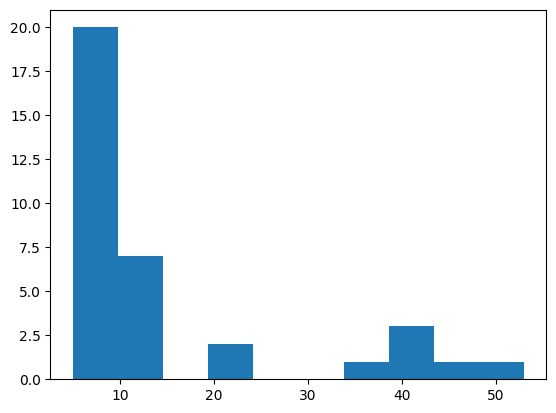

35
479


In [822]:
# トーナメントを開始
monsters = battle_tournament(monsters)
monsters.sort(key=lambda m: m.level)
print(len(monsters))
for monster in monsters:  # モンスターをレベル順にソート
    monster.show()
    if "A" in monster.name:
        print(monster.name)
        monster.hp = monster.max_hp 
plt.hist(list(map(lambda monster: monster.level, monsters)))
plt.show()
print(len(monsters))
print(sum(list(map(lambda monster: monster.level, monsters))))

In [811]:
# 戦略リセット
for monster in monsters:
    monster.strategy = [random.randint(0, 2), random.randint(0, 2), random.randint(0, 2)]